In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Create the maze environment
maze = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 1, 0, 0, 0, 1, 0, 0, 1],
    [1, 0, 1, 0, 1, 0, 1, 0, 1, 1],
    [1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 0, 1, 0, 1, 0, 0, 0],
    [1, 0, 1, 0, 1, 0, 0, 1, 0, 1],
    [1, 0, 0, 0, 1, 0, 1, 0, 0, 1],
    [1, 1, 1, 0, 1, 0, 1, 1, 0, 1],
    [1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
])

# S (start), G (sub-goal), E (end goal) positions in the maze
start_position = (1, 1)       # S (Green)
sub_goal_position = (5, 7)    # G (Blue)
end_goal_position = (8, 8)     # E (Red)

# Define the actions the agent can take: Up, Down, Left, Right
actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

# Set the start, sub-goal, and end-goal positions as open paths (passable)
maze[start_position] = 0
maze[sub_goal_position] = 0
maze[end_goal_position] = 0


In [10]:

# Value Iteration parameters
gamma = 0.9  # Discount factor
theta = 1e-6  # Convergence threshold

# Initialize value function
value_matrix = np.zeros(maze.shape)

# Reward matrix definition
reward_matrix = np.full(maze.shape, -1.0)  # Default negative reward for each step
reward_matrix[sub_goal_position] = 10.0  # Reward for reaching sub-goal
reward_matrix[end_goal_position] = 50.0  # Reward for reaching end goal


In [11]:

# Function to perform Value Iteration
def value_iteration():
    global value_matrix
    
    iteration = 0
    while True:
        delta = 0  # Change in value function
        iteration += 1

        for x in range(maze.shape[0]):
            for y in range(maze.shape[1]):
                if maze[x, y] == 0:  # If it is an open path
                    v = value_matrix[x, y]  # Old value
                    best_value = float('-inf')

                    # Check all possible next states
                    for action in actions:
                        next_state = (x + action[0], y + action[1])
                        if 0 <= next_state[0] < maze.shape[0] and 0 <= next_state[1] < maze.shape[1]:  # Stay within bounds
                            reward = reward_matrix[next_state]  # Get reward for the next state
                            best_value = max(best_value, reward + gamma * value_matrix[next_state])  # Calculate the best value

                    value_matrix[x, y] = best_value  # Update value matrix
                    delta = max(delta, abs(v - value_matrix[x, y]))  # Update delta for convergence check

        # Check for convergence
        if delta < theta:
            print(f"Value iteration converged after {iteration} iterations.")
            break

# Run Value Iteration
value_iteration()

# Function to extract the optimal path from start to goal
def extract_path(start, goal):
    current = start
    path = [current]
    max_steps = 100  # Limit steps to prevent infinite loops
    steps = 0

    while current != goal and steps < max_steps:
        next_state = None
        max_value = float('-inf')

        # Check all possible next states
        for action in actions:
            new_state = (current[0] + action[0], current[1] + action[1])
            if (0 <= new_state[0] < maze.shape[0] and 
                0 <= new_state[1] < maze.shape[1] and 
                maze[new_state] == 0):  # Only consider valid moves
                if value_matrix[new_state] > max_value:
                    max_value = value_matrix[new_state]
                    next_state = new_state

        if next_state is None:  # No valid next state found
            print("No path found.")
            break
        
        path.append(next_state)
        current = next_state
        steps += 1

    return path

# Extract the path to the sub-goal and end-goal
path_to_sub_goal = extract_path(start_position, sub_goal_position)
path_to_end_goal = extract_path(sub_goal_position, end_goal_position)


Value iteration converged after 92 iterations.


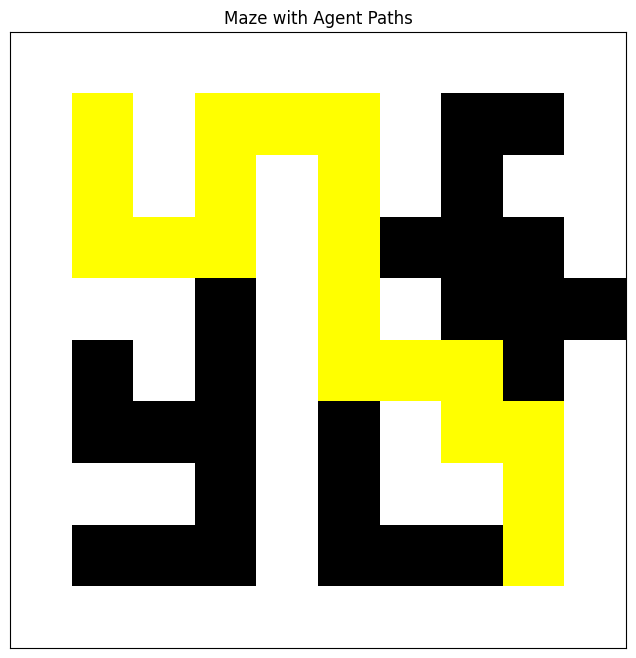

Steps to Sub-goal: 15
Steps to End Goal: 5


In [12]:

# Function to visualize the agent's path
def visualize_paths(paths):
    maze_copy = maze.copy()
    
    # Mark the start, sub-goal, and end-goal positions
    maze_copy[start_position] = 2  # Start (Green)
    maze_copy[sub_goal_position] = 3  # Sub-goal (Blue)
    maze_copy[end_goal_position] = 4  # End Goal (Red)

    for path in paths:
        for step in path:
            maze_copy[step] = 5  # Path (Yellow)

    # Create a color map
    cmap = plt.cm.colors.ListedColormap(['black', 'white', 'green', 'blue', 'red', 'yellow'])
    bounds = [0, 0.5, 1.5, 2.5, 3.5, 4.5]
    norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

    # Visualize the maze with paths
    plt.figure(figsize=(8, 8))
    plt.imshow(maze_copy, cmap=cmap, norm=norm)
    plt.xticks([])
    plt.yticks([])
    plt.title("Maze with Agent Paths")
    plt.show()

# Visualize the paths
visualize_paths([path_to_sub_goal, path_to_end_goal])

# Print the number of steps to each goal
print(f"Steps to Sub-goal: {len(path_to_sub_goal)}")
print(f"Steps to End Goal: {len(path_to_end_goal)}")
